In [115]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#display all columns in DataFrame without truncation
pd.set_option('display.max_columns',None)

In [2]:
# Reading data from an Excel file into a Pandas DataFrame
df = pd.read_excel('hospital admissions data.xlsx')
# Displaying the first few rows of the DataFrame to get an overview of the data
df.head()

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,duration of intensive unit stay,OUTCOME,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,BNP,RAISED CARDIAC ENZYMES,EF,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,STEMI,ATYPICAL CHEST PAIN,HEART FAILURE,HFREF,HFNEF,VALVULAR,CHB,SSS,AKI,CVA INFRACT,CVA BLEED,AF,VT,PSVT,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,2017-04-01 00:00:00,2017-04-03 00:00:00,81,M,R,E,2023-04-17,3,2,DISCHARGE,0,0,1,0,0,0,0,9.5,16.1,337,80,34,0.9,1880,1,35,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,234696,2017-04-01 00:00:00,2017-04-05 00:00:00,65,M,R,E,2023-04-17,5,2,DISCHARGE,0,1,0,1,1,0,0,13.7,9,149,112,18,0.9,NaN,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,3,234882,2017-04-01 00:00:00,2017-04-03 00:00:00,53,M,U,E,2023-04-17,3,3,DISCHARGE,0,0,1,0,1,0,0,10.6,14.7,329,187,93,2.3,210,0,NaN,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,234635,2017-04-01 00:00:00,2017-04-08 00:00:00,67,F,U,E,2023-04-17,8,6,DISCHARGE,0,0,0,1,1,0,0,12.8,9.9,286,130,27,0.6,NaN,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,234486,2017-04-01 00:00:00,2017-04-23 00:00:00,60,F,U,E,2023-04-17,23,9,DISCHARGE,0,0,0,1,0,1,0,13.6,9.1,26,144,55,1.25,1840,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
# Displaying information about the DataFrame including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15757 entries, 0 to 15756
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   SNO                              15757 non-null  int64         
 1   MRD No.                          15757 non-null  object        
 2   D.O.A                            15757 non-null  object        
 3   D.O.D                            15757 non-null  object        
 4   AGE                              15757 non-null  int64         
 5   GENDER                           15757 non-null  object        
 6   RURAL                            15757 non-null  object        
 7   TYPE OF ADMISSION-EMERGENCY/OPD  15757 non-null  object        
 8   month year                       15757 non-null  datetime64[ns]
 9   DURATION OF STAY                 15757 non-null  int64         
 10  duration of intensive unit stay  15757 non-null  int64    

<BarContainer object of 8 artists>

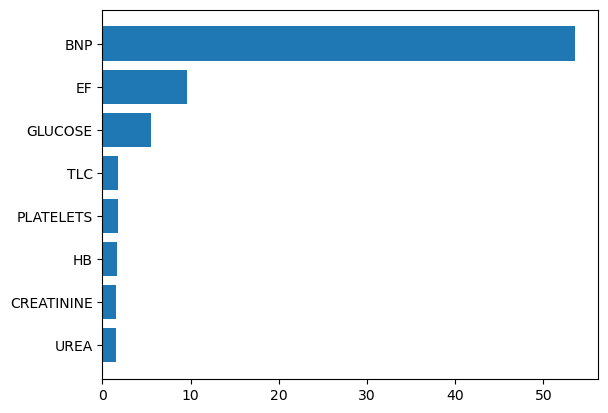

In [4]:
# Calculating the percentage of missing values for each column in the DataFrame
missing_percentage = (df[df.columns[df.isna().sum() > 0]].isna().sum() / len(df) * 100).sort_values()

# Extracting the column names with missing values
columns_with_missing_values = missing_percentage.index

# Creating a horizontal bar plot to visualize the missing data percentages
plt.barh(columns_with_missing_values, missing_percentage)

In [6]:
# Converting specific columns to numeric data type, and converting non-numeric values to NaN
df['BNP'] = pd.to_numeric(df['BNP'],errors='coerce')
df['EF'] = pd.to_numeric(df['EF'],errors='coerce')
df['GLUCOSE'] = pd.to_numeric(df['GLUCOSE'],errors='coerce')
df['TLC'] = pd.to_numeric(df['TLC'],errors='coerce')
df['PLATELETS'] = pd.to_numeric(df['PLATELETS'],errors='coerce')
df['HB'] = pd.to_numeric(df['HB'],errors='coerce')
df['CREATININE'] = pd.to_numeric(df['CREATININE'],errors='coerce')
df['UREA'] = pd.to_numeric(df['UREA'],errors='coerce')

In [7]:
# Exploring the correlation of columns to determine the best strategy for data cleaning
# Drop rows with missing values and convert specific columns to integer type
df_dropped = df.dropna()
columns_to_convert = ['BNP', 'EF', 'GLUCOSE', 'TLC', 'PLATELETS', 'HB', 'CREATININE', 'UREA']
df_dropped[columns_to_convert] = df_dropped[columns_to_convert].astype(int)

C:\Users\Chris\AppData\Local\Temp\ipykernel_292\4020601504.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped[columns_to_convert] = df_dropped[columns_to_convert].astype(int)


In [8]:
# Select only numeric columns in the cleaned DataFrame
df_dropped1 = df_dropped.select_dtypes(include='number')

In [9]:
# Calculate the correlation matrix
corr_matrix = df_dropped1.corr()

# Set the correlation threshold
correlation_threshold = 0.5

In [10]:
# Filter values with correlation greater than 0.5 or less than -0.5
high_correlated_values = corr_matrix[(((corr_matrix > correlation_threshold) & (corr_matrix != 1))
                                      | ((corr_matrix < -correlation_threshold) & (corr_matrix != -1)))]

# Display the first few rows of the high correlated values DataFrame
high_correlated_values.head()

,SNO,AGE,DURATION OF STAY,duration of intensive unit stay,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,BNP,RAISED CARDIAC ENZYMES,EF,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,STEMI,ATYPICAL CHEST PAIN,HEART FAILURE,HFREF,HFNEF,VALVULAR,CHB,SSS,AKI,CVA INFRACT,CVA BLEED,AF,VT,PSVT,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM
SNO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DURATION OF STAY,NaN,NaN,NaN,0.793643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration of intensive unit stay,NaN,NaN,0.793643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SMOKING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Grab columns with at least one non-null value
high_correlated_columns = high_correlated_values.columns[high_correlated_values.notna().any()]

In [13]:
# Extract the high correlated columns from the cleaned DataFrame
high_correlated = df_dropped1[high_correlated_columns]
high_correlated.head()

,DURATION OF STAY,duration of intensive unit stay,PRIOR CMP,CKD,HB,UREA,CREATININE,EF,ANAEMIA,HEART FAILURE,HFREF,HFNEF,AKI,CARDIOGENIC SHOCK,SHOCK
0,3,2,0,0,9,34,0,35,1,1,1,0,0,0,0
4,23,9,1,0,13,55,1,16,0,0,0,0,0,0,0
5,10,8,1,0,13,51,0,25,0,1,1,0,0,0,0
6,6,2,1,0,13,28,0,30,0,1,1,0,0,0,0
10,15,11,0,0,13,45,1,32,0,1,1,0,0,1,1


<Axes: >

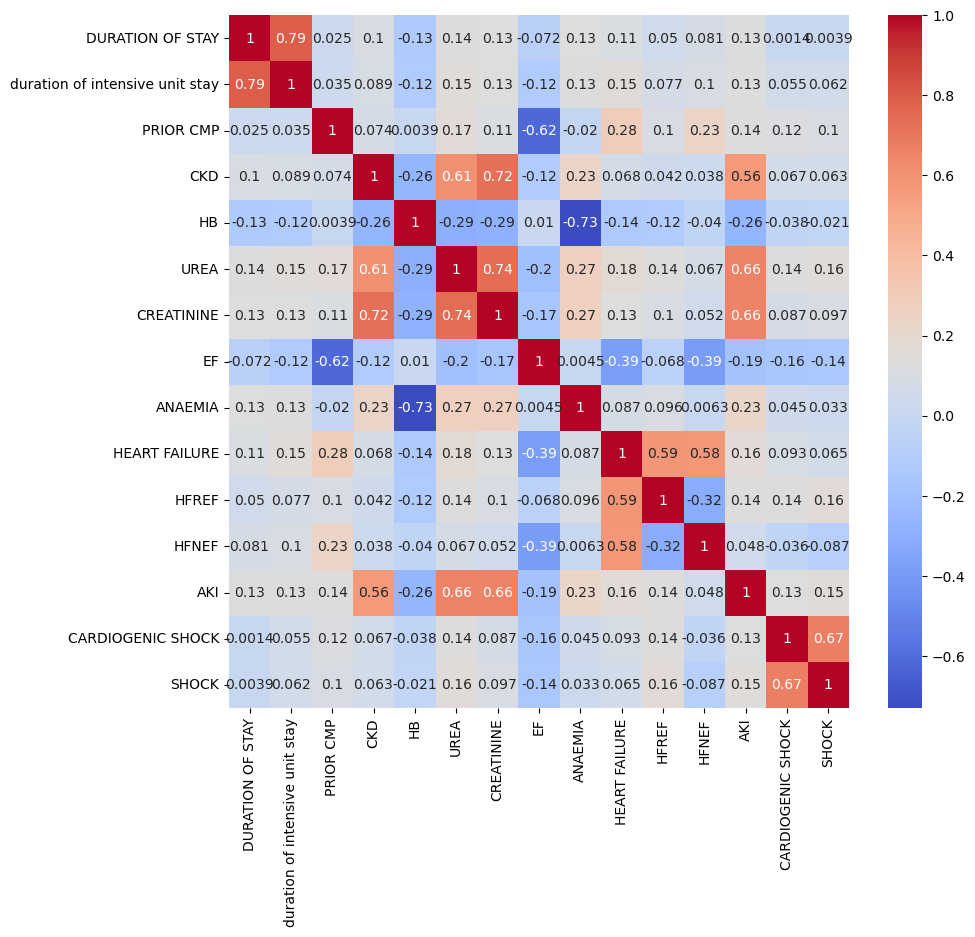

In [14]:
# Plot a heatmap of the correlation matrix for high correlated columns
plt.figure(figsize=(10, 9))
sns.heatmap(high_correlated.corr(), annot=True, cmap='coolwarm')

### Handling missing values

In [16]:
#Given that BNP does not exhibit a high correlation with any other column 
#and the percentage of missing values exceeds 50%, the decision is to drop the column.
df = df.drop('BNP', axis=1)

In [ ]:
#EF

In [91]:
df['EF'] = pd.to_numeric(df['EF'],errors='coerce')

In [ ]:
#EF

In [18]:
df['EF'].isna().sum()

1599

In [19]:
(df[['EF','PRIOR CMP']].sort_values(by = 'EF',ascending = False)).value_counts()

EF    PRIOR CMP
60.0  0            4386
35.0  0             865
45.0  0             791
40.0  0             600
32.0  0             570
42.0  0             501
30.0  1             489
48.0  0             489
38.0  0             463
25.0  1             448
50.0  0             439
30.0  0             420
36.0  0             389
20.0  1             343
34.0  0             327
28.0  1             315
22.0  1             290
28.0  0             255
46.0  0             186
55.0  0             184
25.0  0             177
52.0  0             166
18.0  1             128
44.0  0              99
26.0  0              96
37.0  0              95
24.0  1              89
32.0  1              62
54.0  0              59
33.0  0              49
35.0  1              46
16.0  1              37
27.0  0              33
58.0  0              33
40.0  1              33
38.0  1              25
26.0  1              22
34.0  1              19
56.0  0              19
47.0  0              18
43.0  0              17


In [20]:
#In the analysis, we observe a moderate correlation between EF and prior CMD. 
#We notice instances where prior CMD is 0 correspond to an EF of 60. 
#Consequently, for missing EF values, we plan to impute them using the mode, which is determined to be 60.
df['EF']=df['EF'].fillna(df['EF'].mode()[0])

In [21]:
df['EF'].isna().sum()

0

In [22]:
#GLUCOSE

In [23]:
df['GLUCOSE'].isna().sum()

945

In [25]:
df['GLUCOSE'].head(10)

0     80.0
1    112.0
2    187.0
3    130.0
4    144.0
5    217.0
6    277.0
7    159.0
8    156.0
9    200.0
Name: GLUCOSE, dtype: float64

In [26]:
#In the glucose column, most values were observed to be close to each other. 
#As a result, the decision is  to use forward fill to fill in the missing values. 
#Forward fill involves replacing each missing value with the most recent non-null value in the column,
#allowing for a smoother continuity of values in the dataset. 
df['GLUCOSE'] = df['GLUCOSE'].fillna(method='ffill')

In [27]:
df['GLUCOSE'].isna().sum()

0

In [29]:
#TLC

In [31]:
df['TLC'].head(10)

0    16.1
1     9.0
2    14.7
3     9.9
4     9.1
5    22.3
6    12.6
7     9.5
8     NaN
9     4.8
Name: TLC, dtype: float64

In [33]:
#In the TLC column, most values were observed to be close to each other. 
#As a result, the decision is  to use forward fill to fill in the missing values. 
#allowing for a smoother continuity of values in the dataset. 
df['TLC'] = df['TLC'].fillna(method='ffill')

In [34]:
df['TLC'].isna().sum()

0

In [35]:
#PLATELETS

In [36]:
df['PLATELETS'].isna().sum()

294

In [37]:
df['PLATELETS'].head(10)

0    337.0
1    149.0
2    329.0
3    286.0
4     26.0
5    322.0
6    166.0
7    328.0
8      NaN
9    173.0
Name: PLATELETS, dtype: float64

In [38]:
#In the PLATELETS column, most values were observed to be close to each other. 
#As a result, the decision is  to use backwardfill to fill in the missing values. 
#allowing for a smoother continuity of values in the dataset. 
df['PLATELETS'] = df['PLATELETS'].fillna(method='bfill')

In [39]:
df['PLATELETS'].isna().sum()

0

In [40]:
#HB

<Axes: xlabel='HB', ylabel='ANAEMIA'>

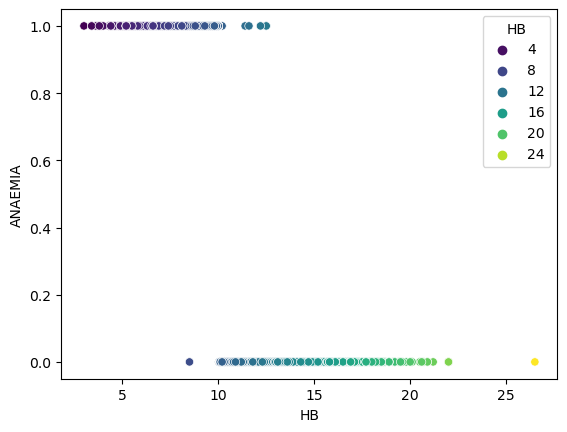

In [41]:
# Analyzing the correlation between 'HB' and 'ANAEMIA'
# Higher hemoglobin levels are correlated with a lower likelihood of anemia
df['HB'] = pd.to_numeric(df['HB'],errors='coerce')
sns.scatterplot(x='HB',y='ANAEMIA',data=df,hue='HB',palette='viridis',alpha=1.0)

In [42]:
# utilizes the groupby operation to calculate the median for each group
df_blood = df[['HB','ANAEMIA']]
df_blood.groupby('ANAEMIA').median()

,HB
ANAEMIA,
0,12.9
1,9.0


In [43]:
# Define a function to replace null values in 'HB' based on 'ANAEMIA' value
def replace_hb(row):
    # Check if 'HB' is null
    if pd.isna(row['HB']):
        # If 'ANAEMIA' is 0, replace null 'HB' with 12.9
        if row['ANAEMIA'] == 0:
            return 12.9
        # If 'ANAEMIA' is 1, replace null 'HB' with 9.0
        elif row['ANAEMIA'] == 1:
            return 9.0
    # If 'HB' is not null, return the original 'HB' value
    return row['HB']

# Apply the replace_hb function to each row using the apply function
df['HB'] = df.apply(replace_hb, axis=1)

In [44]:
df['HB'].isna().sum()

0

In [45]:
#'CREATININE'

In [46]:
df['CREATININE'].isna().sum()

251

<Axes: xlabel='CREATININE', ylabel='CKD'>

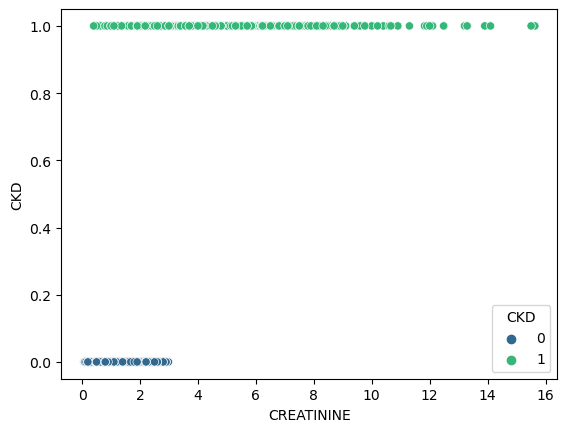

In [47]:
#it is evident that there exists a positive correlation between creatinine levels and the severity of CKD. 
#As creatinine is a waste product normally excreted by the kidneys, 
#elevated levels of creatinine in the blood suggest reduced kidney function

df['CREATININE'] = pd.to_numeric(df['CREATININE'],errors='coerce')
sns.scatterplot(x='CREATININE',y='CKD',data=df,hue='CKD',palette='viridis',alpha=1.0)

In [50]:
# Counting occurrences of unique pairs in the 'CREATININE' and 'CKD' columns
#'CKD' is a binary column indicating the presence (1) or absence (0) of chronic kidney disease
df[['CREATININE','CKD']].value_counts()

CREATININE  CKD
0.80        0      1538
0.70        0      1410
0.90        0      1273
0.60        0       970
1.00        0       907
                   ... 
3.18        1         1
3.19        1         1
3.21        1         1
3.27        1         1
15.63       1         1
Name: count, Length: 553, dtype: int64

In [51]:
#Grouping the DataFrame by the 'CKD' column and calculating the median of 'CREATININE' for each group
df[['CREATININE','CKD']].groupby('CKD').median()

,CREATININE
CKD,
0,0.9
1,3.5


In [52]:
# Define a function to replace null values in CREATININE based on CKD value
def replace_CREATININE(row):
    # Check if CREATININE is null
    if pd.isna(row['CREATININE']):
        # If CKD is 0, replace null 'CREATININE' with 0.9
        if row['CKD'] == 0:
            return  0.9
        # If CKD is 1, replace null 'CREATININE' with 3.5
        elif row['CKD'] == 1:
            return 3.5
    # If CREATININE is not null, return the original CREATININE value
    return row['CREATININE']

# Apply the replace_CKD function to each row using the apply function
df['CREATININE'] = df.apply(replace_CREATININE, axis=1)

In [53]:
df['CREATININE'].isna().sum()

0

In [56]:
#UREA

In [57]:
df['UREA'].isna().sum()

244

<Axes: xlabel='UREA', ylabel='CREATININE'>

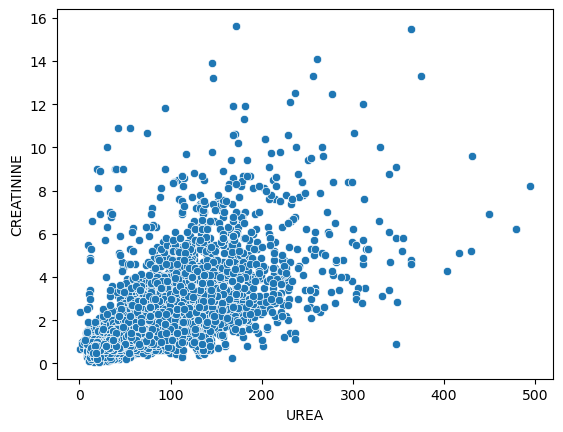

In [58]:
#Creatinine and UREA are among the substances that the kidneys filter out, 
#and their concentrations in the blood are correlated 

df['UREA'] = pd.to_numeric(df['UREA'],errors='coerce')
sns.scatterplot(x='UREA',y='CREATININE',data=df)

In [61]:
# Extracting a subset DataFrame with 'CREATININE' and 'UREA'
df_urea = df[['CREATININE', 'UREA']]

# Counting occurrences of unique 'CREATININE' values for rows where 'UREA' is NaN
urea_nan_creatinine_counts = df_urea[df_urea['UREA'].isna()]['CREATININE'].value_counts()
urea_nan_creatinine_counts

CREATININE
0.9    229
3.5     11
1.1      1
2.6      1
1.2      1
0.8      1
Name: count, dtype: int64

In [62]:
# Calculating the median of 'UREA' values where 'CREATININE' is equal to 0.90
urea_median = df_urea[df_urea['CREATININE'] == 0.90]['UREA'].median()

# Filling missing values in the original DataFrame's 'UREA' column with the calculated median
df['UREA'] = df['UREA'].fillna(urea_median)

In [63]:
df['UREA'].isna().sum()

0

In [66]:
#confirming there are no missing values
df.isna().sum()

SNO                                0
MRD No.                            0
D.O.A                              0
D.O.D                              0
AGE                                0
GENDER                             0
RURAL                              0
TYPE OF ADMISSION-EMERGENCY/OPD    0
month year                         0
DURATION OF STAY                   0
duration of intensive unit stay    0
OUTCOME                            0
SMOKING                            0
ALCOHOL                            0
DM                                 0
HTN                                0
CAD                                0
PRIOR CMP                          0
CKD                                0
HB                                 0
TLC                                0
PLATELETS                          0
GLUCOSE                            0
UREA                               0
CREATININE                         0
RAISED CARDIAC ENZYMES             0
EF                                 0
S

In [69]:
#noticed invalid entry in the chest infection column 

In [70]:
df['CHEST INFECTION'].unique()

array([0, 1, '\\'], dtype=object)

In [71]:
df[df['CHEST INFECTION']=='\\']

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,duration of intensive unit stay,OUTCOME,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,RAISED CARDIAC ENZYMES,EF,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,STEMI,ATYPICAL CHEST PAIN,HEART FAILURE,HFREF,HFNEF,VALVULAR,CHB,SSS,AKI,CVA INFRACT,CVA BLEED,AF,VT,PSVT,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
3252,3253,354971,2017-09-23 00:00:00,2017-09-24 00:00:00,65,F,U,O,2023-09-17,2,0,DISCHARGE,0,0,1,1,0,0,0,9.4,10.7,264.0,249.0,27.0,0.8,0,60.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,\


In [72]:
# Converting 'CHEST INFECTION' column to numeric and  '\\' to NaN
df['CHEST INFECTION'] = pd.to_numeric(df['CHEST INFECTION'], errors='coerce')

# Filling missing values using forward fill method
df['CHEST INFECTION'] = df['CHEST INFECTION'].fillna(method='ffill')

### Checking for duplicates 

In [73]:
#Display rows that are duplicates 
df[df.duplicated()]

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,duration of intensive unit stay,OUTCOME,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,RAISED CARDIAC ENZYMES,EF,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,STEMI,ATYPICAL CHEST PAIN,HEART FAILURE,HFREF,HFNEF,VALVULAR,CHB,SSS,AKI,CVA INFRACT,CVA BLEED,AF,VT,PSVT,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION


### Feature engineering 

In [74]:
# Converting 'D.O.A' (Date of Admission) column to datetime format, coercing errors to NaN
df['D.O.A'] = pd.to_datetime(df['D.O.A'], errors='coerce')

# Converting 'D.O.D' (Date of Discharge) column to datetime format, coercing errors to NaN
df['D.O.D'] = pd.to_datetime(df['D.O.D'], errors='coerce')

In [75]:
# Extracting year, month, and day components from the Date of Admission
df['arrival_year']=df['D.O.A'].dt.year
df['arrival_month']=df['D.O.A'].dt.month
df['arrival_day']=df['D.O.A'].dt.day

In [76]:
# Extracting year, month, and day components from the Date of Discharge
df['discharge_year']=df['D.O.D'].dt.year
df['discharge_month']=df['D.O.D'].dt.month
df['discharge_day']=df['D.O.D'].dt.day

## VISUALIZATION

In [84]:
#Commonly Admitted Diseases

In [77]:
diseases = df[['SMOKING ', 'ALCOHOL','DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD','RAISED CARDIAC ENZYMES',
'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI',
'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR',
'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT',
'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC',
'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK',
'PULMONARY EMBOLISM', 'CHEST INFECTION']]

In [80]:
# Counting how many times each disease appears
sorted_values = diseases.apply(lambda x: x.value_counts()).iloc[1]
sorted_values

SMOKING                        793
ALCOHOL                       1021
DM                            5097
HTN                           7656
CAD                          10551
PRIOR CMP                     2434
CKD                           1550
RAISED CARDIAC ENZYMES        3122
SEVERE ANAEMIA                 305
ANAEMIA                       2787
STABLE ANGINA                 1289
ACS                           5763
STEMI                         2202
ATYPICAL CHEST PAIN            403
HEART FAILURE                 4561
HFREF                         2421
HFNEF                         2152
VALVULAR                       552
CHB                            412
SSS                            107
AKI                           3504
CVA INFRACT                    464
CVA BLEED                       67
AF                             800
VT                             519
PSVT                           119
CONGENITAL                     165
UTI                            975
NEURO CARDIOGENIC SY

Text(0.5, 1.0, 'Commonly Admitted Diseases')

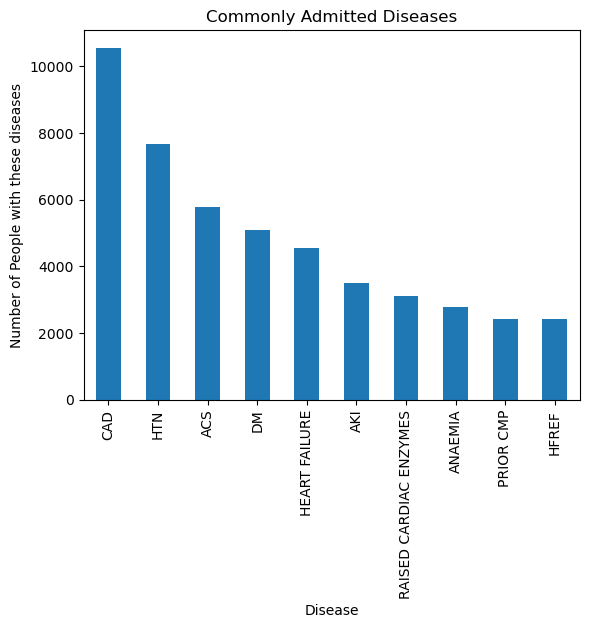

In [83]:
sorted_values.nlargest(10).plot(kind='bar')
plt.xlabel('Disease')
plt.ylabel('Number of People with these diseases')
plt.title('Commonly Admitted Diseases')

In [90]:
#Trend of monthly admissions from 2017 to 2019

In [87]:
# Grouping data by 'arrival_month' and 'arrival_year' and counting occurrences
# Creating a new DataFrame 'grouped_data' by grouping based on 'arrival_month' and 'arrival_year'
# The 'size()' function counts the number of occurrences in each group
# The 'reset_index()' function resets the index of the resulting DataFrame
# The 'name='count'' parameter assigns a name 'count' to the new column containing the counts
grouped_data = df.groupby(['arrival_month', 'arrival_year']).size().reset_index(name='count')
grouped_data 

,arrival_month,arrival_year,count
0,1,2017,16
1,1,2018,655
2,1,2019,648
3,2,2017,18
4,2,2018,672
5,2,2019,571
6,3,2017,23
7,3,2018,736
8,3,2019,528
9,4,2017,502


In [88]:
# Dictionary to map numerical month values to month names
months = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
          7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Creating a new column 'admission_month' by mapping 'arrival_month' values to month names
grouped_data['admission_month'] = grouped_data['arrival_month'].map(months)

Text(0.5, 1.0, 'Monthly Distribution of Admissions Over the Years')

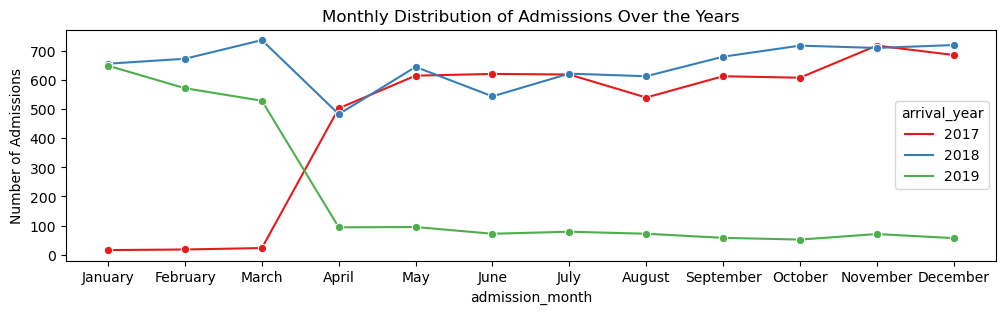

In [89]:
plt.figure(figsize=(12,3))
sns.lineplot(x='admission_month', y='count', hue='arrival_year', data=grouped_data,marker='o',palette='Set1')
plt.ylabel('Number of Admissions')
plt.title('Monthly Distribution of Admissions Over the Years')

In [91]:
#Top 10 deadly ddiseases and the number of men and women who died from them 

In [92]:
diseases_outcome =df[['SMOKING ', 'ALCOHOL','DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD','RAISED CARDIAC ENZYMES',
'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI',
'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR',
'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT',
'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC',
'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK',
'PULMONARY EMBOLISM', 'CHEST INFECTION','OUTCOME','GENDER']]
#Filter rows where outcome is expiry
dead_patients = diseases_outcome[diseases_outcome['OUTCOME']=='EXPIRY']

In [93]:
# Sum the occurrences for each disease by gender
deaths_by_disease_gender = dead_patients.groupby(['GENDER']).sum().drop(['OUTCOME'], axis=1)

In [94]:
# Get the top 10 diseases with the most deaths overall
top_10_diseases = deaths_by_disease_gender.sum().nlargest(10)

In [95]:
# Filter the DataFrame to include only the top 10 diseases
top_10_deadly_diseases = dead_patients[['GENDER'] + list(top_10_diseases.index)]

In [96]:
# Melt the DataFrame to long format for better plotting
melted_data = pd.melt(top_10_deadly_diseases, id_vars=['GENDER'], var_name='Disease', value_name='Value')

In [98]:
melted_data

,GENDER,Disease,Value
0,F,HEART FAILURE,1
1,M,HEART FAILURE,1
2,M,HEART FAILURE,1
3,M,HEART FAILURE,1
4,M,HEART FAILURE,1
...,...,...,...
11045,M,RAISED CARDIAC ENZYMES,1
11046,M,RAISED CARDIAC ENZYMES,1
11047,M,RAISED CARDIAC ENZYMES,1
11048,F,RAISED CARDIAC ENZYMES,1


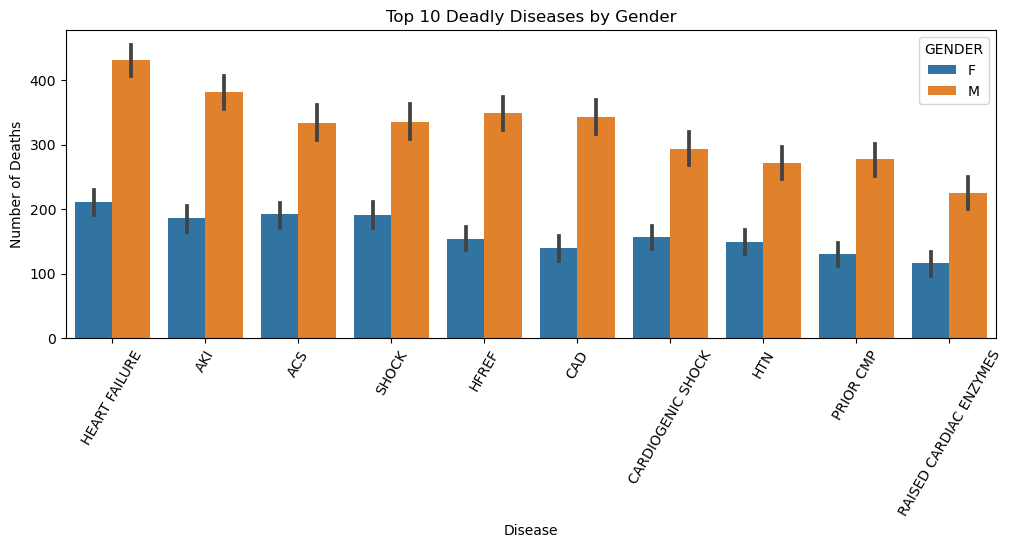

In [99]:
plt.figure(figsize=(12,4))
sns.barplot(x='Disease', y='Value', hue='GENDER', data=melted_data,estimator=sum)
plt.xlabel('Disease')
plt.ylabel('Number of Deaths')
plt.title('Top 10 Deadly Diseases by Gender')
plt.xticks(rotation=60)
plt.show()

In [100]:
#Trend in deaths over the years 

In [101]:
diseases_year =df[['SMOKING ', 'ALCOHOL','DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD','RAISED CARDIAC ENZYMES',
'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI',
'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR',
'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT',
'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC',
'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK',
'PULMONARY EMBOLISM', 'CHEST INFECTION','OUTCOME','arrival_year']]
#Filter rows where outcome is expiry
dead_patients = diseases_year[diseases_year['OUTCOME']=='EXPIRY']

In [102]:
# Sum the occurrences for each disease per year
deaths_by_disease_year = dead_patients.groupby(['arrival_year']).sum().drop(['OUTCOME'], axis=1)

In [103]:
# Get the top 10 diseases with the most deaths overall
top_10_diseases = deaths_by_disease_year.sum().nlargest(10)

In [104]:
# Filter the DataFrame to include only the top 10 diseases
top_10_deadly_diseases = dead_patients[['arrival_year'] + list(top_10_diseases.index)]

In [105]:
# Melt the DataFrame to long format for better plotting
melted_data = pd.melt(top_10_deadly_diseases, id_vars=['arrival_year'], var_name='Disease', value_name='Value')

Text(0.5, 1.0, 'Trend in deaths over the years ')

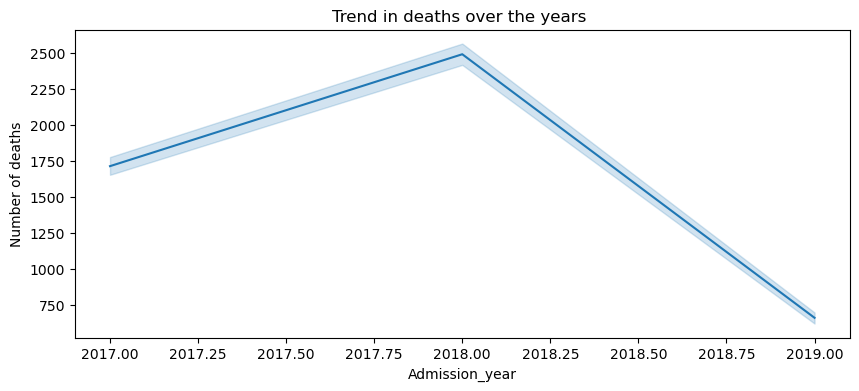

In [106]:
plt.figure(figsize=(10,4))
sns.lineplot(x='arrival_year', y='Value', data=melted_data,estimator=sum)
plt.xlabel('Admission_year')
plt.ylabel('Number of deaths')
plt.title('Trend in deaths over the years ')

In [107]:
#Disease distribution across age groups 

In [108]:
#distribution of age
df['AGE'].describe()

count    15757.000000
mean        61.426160
std         13.420862
min          4.000000
25%         54.000000
50%         62.000000
75%         70.000000
max        110.000000
Name: AGE, dtype: float64

In [109]:
diseases_age =df[['SMOKING ', 'ALCOHOL','DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD','RAISED CARDIAC ENZYMES',
'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI',
'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR',
'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT',
'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC',
'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK',
'PULMONARY EMBOLISM', 'CHEST INFECTION','AGE']]

In [110]:
# Create age groups
bins = [0, 40, 60, 80, float('inf')]
labels = ['0-40', '41-60', '61-80', '81+']
diseases_age['Age_Group'] = pd.cut(diseases_age['AGE'], bins=bins, labels=labels, right=False)

C:\Users\Chris\AppData\Local\Temp\ipykernel_292\2007045542.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diseases_age['Age_Group'] = pd.cut(diseases_age['AGE'], bins=bins, labels=labels, right=False)


In [111]:
# Drop the original 'AGE' column to avoid redundancy in the heatmap
diseases_age = diseases_age.drop('AGE', axis=1)

Text(120.72222222222221, 0.5, 'Age Group')

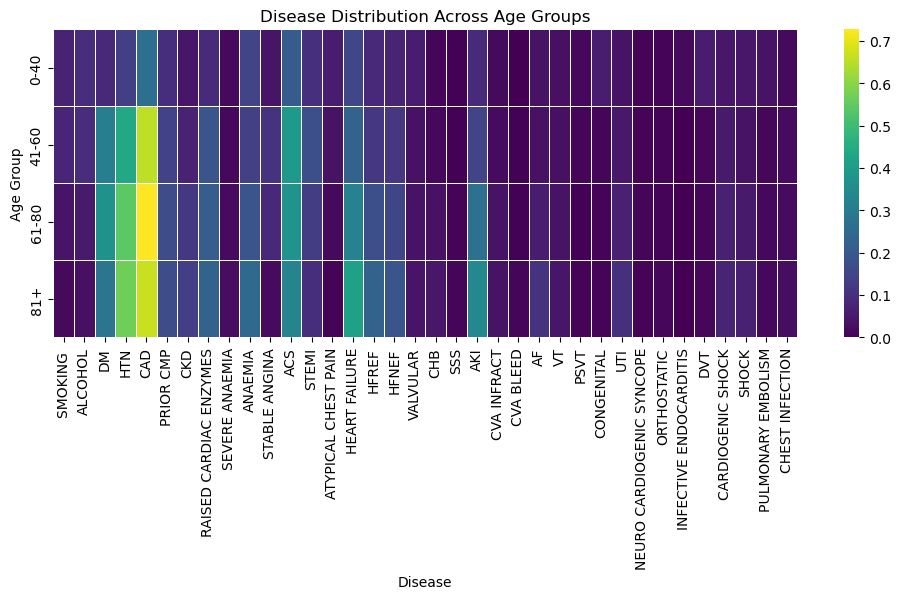

In [112]:
plt.figure(figsize=(12,4))
sns.heatmap(diseases_age.groupby('Age_Group').mean(), cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Disease Distribution Across Age Groups')
plt.xlabel('Disease')
plt.ylabel('Age Group')

In [113]:
# Exploring the Variation in Admission Numbers Based on Rural or Urban Locations

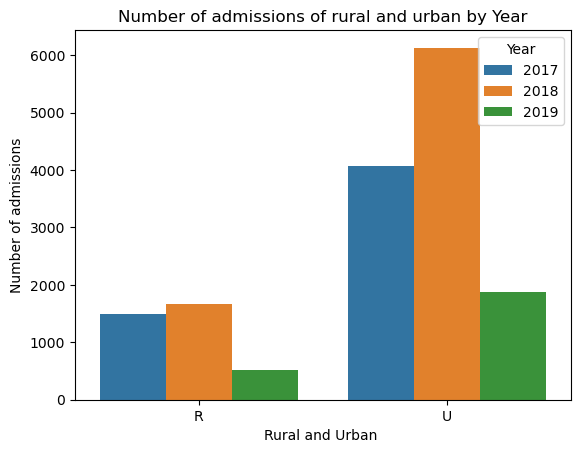

In [114]:
sns.countplot(x='RURAL', hue='arrival_year', data=df)
plt.title('Number of admissions of rural and urban by Year')
plt.xlabel('Rural and Urban ')
plt.ylabel('Number of admissions')
plt.legend(title='Year', loc='upper right') 